In [1]:
import qiskit, sys
import numpy as np, matplotlib.pyplot as plt
sys.path.insert(1, '../')
import qtm.base, qtm.constant, qtm.nqubit, qtm.onequbit

In [5]:
num_qubits = 3
thetas = np.ones((2*num_qubits*3))
theta = np.random.uniform(0, 2*np.pi)
# Init quantum tomography n qubit
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_w_state(qc)
qc = qtm.nqubit.u_cluster_nqubit(qc, thetas)
print(qiskit.quantum_info.Statevector.from_instruction(qc))
qc.draw()

Statevector([0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.57735027+0.j,
             0.57735027+0.j, 0.57735027+0.j],
            dims=(2, 2, 2))


░ ┌───┐┌─────┐          ┌───┐┌───────┐┌───────┐┌───────┐
q_0: ─░─┤ X ├┤0    ├──■───────┤ X ├┤ RZ(0) ├┤ RX(0) ├┤ RZ(0) ├
      ░ └───┘│     │┌─┴─┐     └─┬─┘├───────┤├───────┤├───────┤
q_1: ─░──────┤1 w3 ├┤ X ├──■────┼──┤ RZ(0) ├┤ RX(0) ├┤ RZ(0) ├
      ░      │     │└───┘┌─┴─┐  │  ├───────┤├───────┤├───────┤
q_2: ─░──────┤2    ├─────┤ X ├──■──┤ RZ(0) ├┤ RX(0) ├┤ RZ(0) ├
      ░      └─────┘     └───┘     └───────┘└───────┘└───────┘
c: 3/═════════════════════════════════════════════════════════

Step: 100%|██████████| 200/200 [02:05<00:00,  1.59it/s]


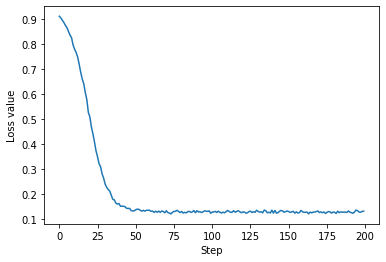

In [7]:
# Init parameters
num_qubits = 3
thetas = np.ones((2*num_qubits*3))
theta = np.random.uniform(0, 2*np.pi)
# Init quantum tomography n qubit
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_w_state(qc)
# Reduce loss value in 100 steps
thetas, loss_values = qtm.base.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.sgd,
    verbose = 1
)
# Plot loss value in 100 steps
plt.plot(loss_values)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

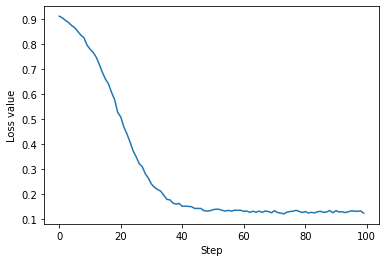

In [9]:
plt.plot(loss_values[:100])
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.savefig('w_init2', dpi = 600)

In [3]:
# Get statevector from circuit
psi = qiskit.quantum_info.Statevector.from_instruction(qc)
rho_psi = qiskit.quantum_info.DensityMatrix(psi)
psi_hat = qiskit.quantum_info.Statevector(qtm.base.get_u_hat(
    thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nqubit, 
    num_qubits = qc.num_qubits
))
rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
# Calculate the metrics
trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
print("Trace: ", trace)
print("Fidelity: ", fidelity)

Trace:  0.008715837036442003
Fidelity:  (0.9999240341854119-6.280715422572747e-16j)


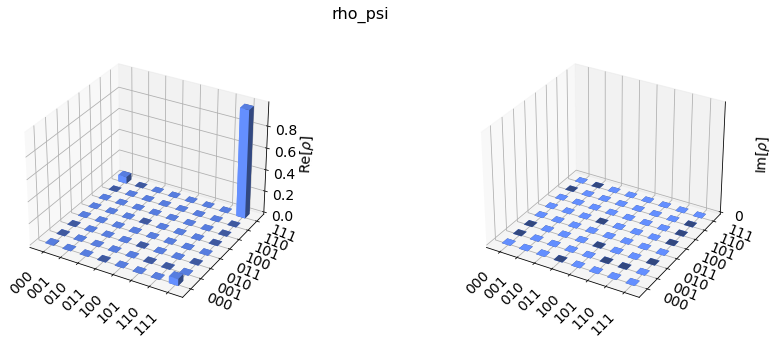

In [5]:
qiskit.visualization.plot_state_city(rho_psi, title = 'rho_psi')

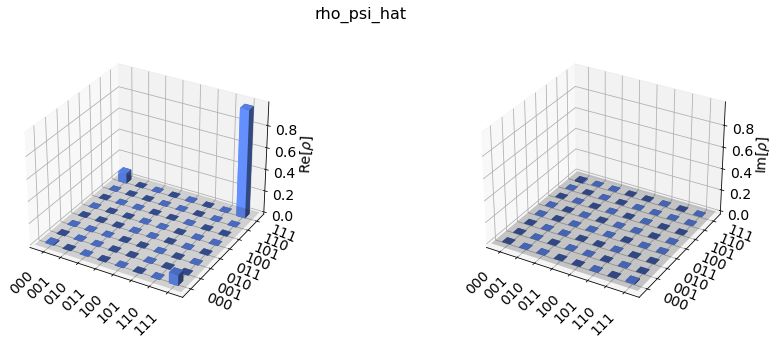

In [6]:
qiskit.visualization.plot_state_city(rho_psi_hat, title = 'rho_psi_hat')